<a href="https://colab.research.google.com/github/A01302935/David-Mireles-Samaniego/blob/main/01_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [20]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [21]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [22]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

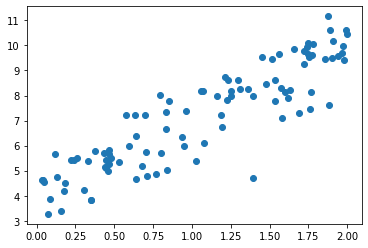

In [78]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [24]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [25]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [26]:
#X_fit[]

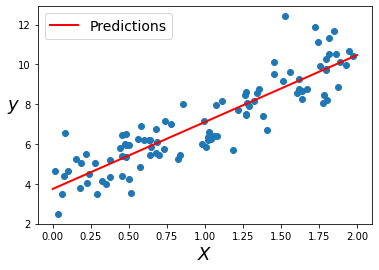

In [27]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [28]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [29]:
X_new.shape

(2, 1)

In [30]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [31]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [32]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

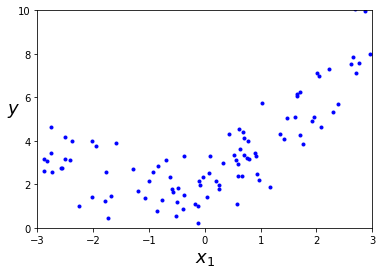

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.998940
1,4.320418
2,2.599923
3,2.175267
4,0.447174
...,...
95,0.565325
96,2.759217
97,3.314489
98,3.124415


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[-2.38324557e+00,  5.67985946e+00],
       [ 4.25427011e-01,  1.80988142e-01],
       [-2.88979418e+00,  8.35091039e+00],
       [-1.05861711e-01,  1.12067018e-02],
       [-1.73790252e+00,  3.02030517e+00],
       [-9.23900594e-01,  8.53592308e-01],
       [ 1.65482841e+00,  2.73845708e+00],
       [ 2.64742503e+00,  7.00885927e+00],
       [-2.56550237e+00,  6.58180240e+00],
       [ 2.05453236e-01,  4.22110321e-02],
       [ 2.29520091e+00,  5.26794724e+00],
       [-2.50494879e+00,  6.27476846e+00],
       [ 1.94708428e+00,  3.79113720e+00],
       [-8.53191894e-01,  7.27936409e-01],
       [-1.06743179e+00,  1.13941062e+00],
       [ 2.86479832e+00,  8.20706940e+00],
       [-1.79484546e+00,  3.22147023e+00],
       [ 1.15916364e+00,  1.34366036e+00],
       [ 1.92864437e+00,  3.71966910e+00],
       [-2.75289903e+00,  7.57845306e+00],
       [ 1.02231275e+00,  1.04512336e+00],
       [ 2.70929985e+00,  7.34030566e+00],
       [-2.25468020e+00,  5.08358280e+00],
       [ 2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[-2.38324557]
[5.67985946]


In [ ]:
X_poly[0]

array([-2.38324557,  5.67985946])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.89643337, 0.48819444]]), array([2.09460069]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

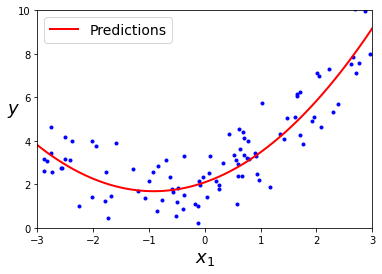

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [33]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
597,4.787700,33.916306
700,5.139742,38.849155
632,4.946467,36.827384
586,4.724777,35.449822
602,4.798105,40.280771
154,3.112526,35.130281
65,2.502705,44.442539
745,5.314816,29.963480
478,4.342330,30.460253
67,2.520240,61.879641


In [34]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [35]:
len(X)

1000

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

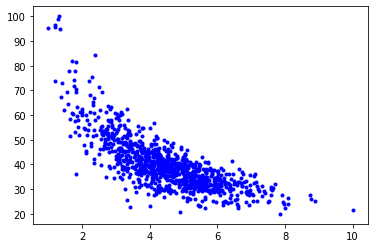

In [ ]:
plt.plot(X,y,'b.')

In [36]:
#lineal
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

### **Plot the Model's Prediction:**

In [37]:
#X_fit[]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


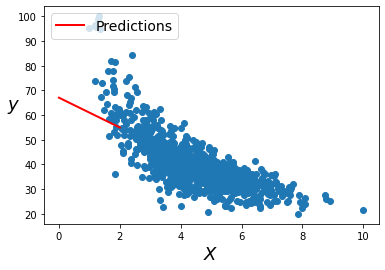

In [44]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [45]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [46]:
X_new.shape

(2, 1)

In [47]:
y_new = linear_reg.predict(X_new)
y_new

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([67.03904193, 54.97230533])

In [48]:
 linear_reg.coef_, linear_reg.intercept_

(array([-6.0333683]), 67.03904193389238)

### **The Model estimates:**
$\hat{y} = -6.033+ 67.039$

In [81]:
# find theta. 
# 1) use NumPy's matrix inverse function.
# 2) use dot method for matrix multiply.

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# results:
print(theta_best) # compare to generated data: y = 4 + 3x + noise

[[4.04153045]
 [2.9440724 ]]


[[4.04153045]
 [6.98560285]
 [9.92967524]]


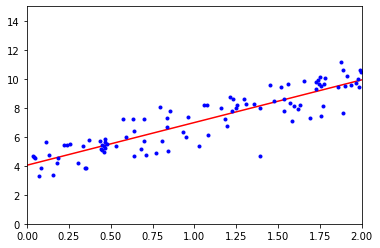

In [82]:
# make some predictions

X_new     = np.array([[0],[1],[2]])
X_new_b   = np.c_[np.ones((3, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)

# then plot

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [83]:
# Scikit equivalent
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X,y)
print("intercept & coefficient:\n", lin_reg.intercept_, lin_reg.coef_)
print("predictions:\n", lin_reg.predict(X_new))

intercept & coefficient:
 [4.04153045] [[2.9440724]]
predictions:
 [[4.04153045]
 [6.98560285]
 [9.92967524]]


### **Gradiente Desendente**

In [84]:
# Gradient Descent - Batch
# (Batch: math includes full training set X.)

# need to find partial derivative (slope) of the cost function
# for each model parameter (theta).

theta_path_bgd = []

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)

print(theta)

[[4.04153045]
 [2.9440724 ]]


In [88]:
# Gradient Descent - Stochastic
# Stochastic: finds gradients based on random instances
# adv: better for huge datasets
# dis: much more erratic than batch GD 
#      -- good for avoiding local minima
#      -- bad b/c may not find optimum sol'n

# simulated annealing helps. (gradually reduces learning rate)

theta_path_sgd = []

n_epochs, t0, t1 = 50, 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi =   y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

print(theta)

[[4.02249488]
 [2.91645191]]


In [111]:
# SGD Regression using Scikit:

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

TypeError: ignored

In [91]:
# Gradient Descent - MiniBatch
# adv: performance boost via GPUs

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

import numpy.random as rnd

rnd.seed(42)
theta = rnd.randn(2,1)  # random initialization

t0, t1 = 10, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = rnd.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        t += 1

        xi = X_b_shuffled[i:i+minibatch_size]
        yi =   y_shuffled[i:i+minibatch_size]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

print(theta)

[[3.98400413]
 [2.87070597]]


In [92]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

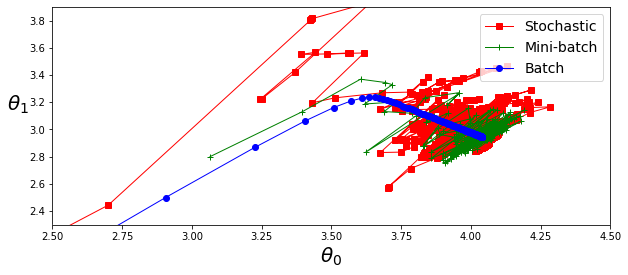

In [93]:
plt.figure(figsize=(10,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=1, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
#save_fig("gradient_descent_paths_plot")
plt.show()

In [79]:
#polinomial

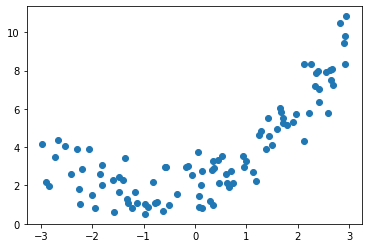

In [94]:
# example quadratic equation + noise: y = 0.5*X^2 + X + 2 + noise
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X,y)
plt.show()

In [95]:
# fit using Scikit

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

# caution: PolynomialFeatures converts array of n features
# into array of (n+d)!/d!n! features -- combinatorial explosions possible :-)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
print(poly_features)

# X_poly: original feature of X, plus its square.
X_poly = poly_features.fit_transform(X)

#print(X, X_poly)
print(X[0], X_poly[0])

# fit it:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

# result estimate: 0.48x(1)^2 + 0.99x(2) + 2.06
# original:        0.50x(1)^2 + 1.00x(2) + 2.00 + gaussian noise

PolynomialFeatures(include_bias=False)
[2.38942838] [2.38942838 5.709368  ]
[1.9735233] [[0.95038538 0.52577032]]


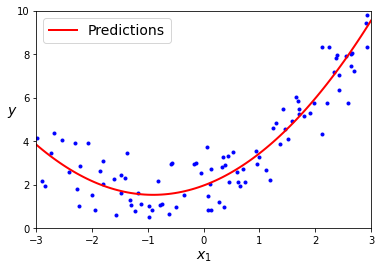

In [96]:
X_new      = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new      = lin_reg.predict(X_new_poly)

#testme = np.linspace(-3,3,20)
#print(testme, testme.reshape(20,1))

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

### **Curvas de Aprendizaje**

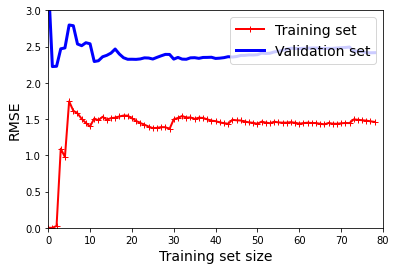

In [97]:
# another way to check for underfit & overfit:
# use learning curve plots to see performance vs training set size.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# train model multiple times on various training subsets (of various sizes)

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
#save_fig("underfitting_learning_curves_plot")
plt.show()

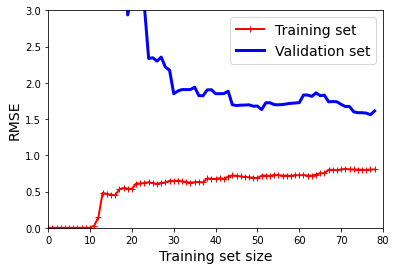

In [98]:
# repeat exercise for 10th-degree polynomial

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,80,0,3])
plt.show()

# note: training error rate much lower than on Linear Regression
# note: training/validation gap closes to zero. good fit?

In [ ]:
# Bias/Variance Tradeoff
# Bias: the part of generalization error due to wrong assumptions.
# Variance: due to model sensitivity to small training variations. (More common in high-dimensional models.)
# Irreducibility: due to data noise.

# Rule of thumb: increasing model complexity increases variance & reduces bias (and vice versa.)

### **Regularizacion**

In [ ]:
# Ridge -- regularization term added to cost function.
# alpha param -- forces model weights to minimal values. higher alpha = "flatter" function (converge to mean)

array([[1.00650911],
       [1.55071465],
       [1.73211649],
       [2.09492018]])

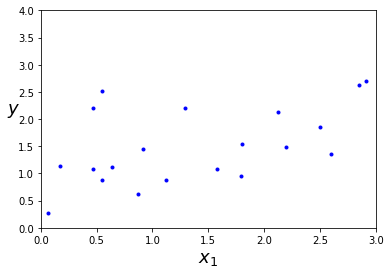

In [99]:
import numpy.random as rnd

rnd.seed(42)
m = 20
X = 3 * rnd.rand(m, 1)
y = 1 + 0.5 * X + rnd.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

# plot it
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 4])

# apply Ridge regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[0.0],[1.5],[2.0],[3.0]])

In [100]:
# Ridge using SGD:
sgd_reg = SGDRegressor(penalty="l2") 
sgd_reg.fit(X,y.ravel())
ridge_reg.predict([[0.0],[1.5],[2.0],[3.0]])

array([[1.00650911],
       [1.55071465],
       [1.73211649],
       [2.09492018]])

In [101]:
# Lasso -- similar to Ridge, also adds regularization term
# uses L1 norm (instead of 1/2 square of L2 norm, as in Ridge.)
# -- tends to force least important features to zero.

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[0.0],[1.5],[2.0],[3.0]])

array([1.14537356, 1.53788174, 1.66871781, 1.93038993])

In [108]:
# Elastic Net -- midddle ground.
# regularization = mix of Ridge & Lasso (mix ratio "r")

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[0.0],[1.5],[2.0],[3.0]])

array([3.55886814, 4.78114505, 5.18857068, 6.00342195])

In [110]:
# Early Stopping -- stop training when minimum validation error reached

# build dataset
rnd.seed(42)
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + rnd.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

poly_scaler = Pipeline((
    ("poly_features", PolynomialFeatures(
        degree=90, 
        include_bias=False)),
    ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)

    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict   = sgd_reg.predict(X_val_poly_scaled)

    train_errors.append(mean_squared_error(y_train_predict, y_train))
    val_errors.append(mean_squared_error(y_val_predict, y_val))

best_epoch    = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
#save_fig("early_stopping_plot")
plt.show()

TypeError: ignored

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13464,3420069060,20141107T000000,790000.0,3,2.50,2640,432036,1.5,0,3,...,10,2640,0,1996,0,98022,47.1795,-122.036,1500,560617
9994,6738700335,20140701T000000,1695000.0,4,2.75,3770,10900,2.0,0,2,...,9,3070,700,1924,0,98144,47.5849,-122.290,3000,5000
2645,4147200140,20140821T000000,895000.0,4,3.00,3500,13444,2.0,0,0,...,10,2360,1140,1977,0,98040,47.5468,-122.231,3140,12935
2255,4035900060,20140919T000000,515000.0,3,1.75,1600,20873,1.0,0,0,...,8,1600,0,1955,0,98006,47.5632,-122.182,2640,18364
3931,3592500985,20150504T000000,880000.0,4,2.50,2350,4675,2.0,0,0,...,9,2150,200,1923,0,98112,47.6344,-122.305,2240,3848
13459,8635751120,20140519T000000,611000.0,4,2.50,2460,4200,2.0,0,0,...,8,2460,0,1998,0,98074,47.6031,-122.021,2330,4200
11149,5515600163,20140916T000000,420000.0,5,2.25,3070,64033,1.0,0,0,...,9,2730,340,1983,0,98001,47.3238,-122.292,1560,28260
6179,9136102057,20140905T000000,650000.0,4,2.50,2160,3139,1.0,0,0,...,7,1080,1080,1940,0,98103,47.6662,-122.338,1650,3740
812,4307350200,20150512T000000,347000.0,3,2.50,1680,4308,2.0,0,0,...,7,1680,0,2004,0,98056,47.4802,-122.179,2160,4182
19396,8149600265,20150514T000000,725000.0,4,1.75,1980,5850,1.0,0,1,...,8,1380,600,1960,0,98116,47.5607,-122.391,1810,5850


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


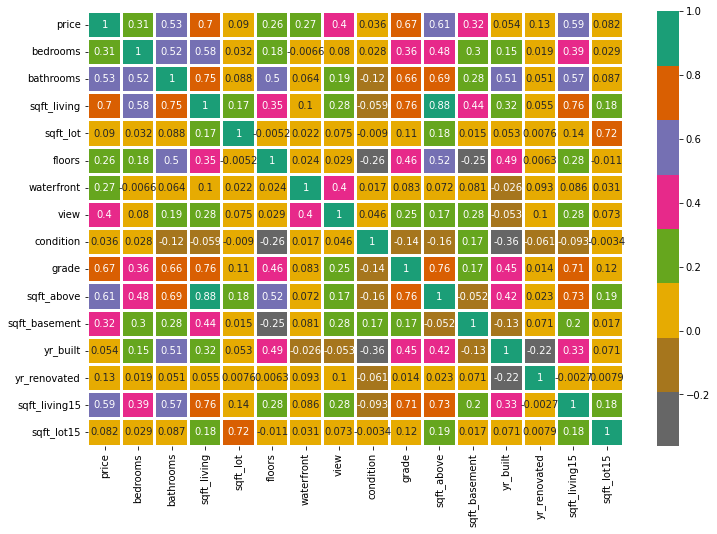

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [ ]:
#tu codigo aquí

### **Regresion Polinomial**

In [117]:
m = 100
X = df[features]
y = df[label]

plt.scatter(X,y)
plt.show()

NameError: ignored

In [114]:
# fit using Scikit

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LinearRegression

# caution: PolynomialFeatures converts array of n features
# into array of (n+d)!/d!n! features -- combinatorial explosions possible :-)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
print(poly_features)

# X_poly: original feature of X, plus its square.
X_poly = poly_features.fit_transform(X)

#print(X, X_poly)
print(X[0], X_poly[0])

# fit it:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

# result estimate: 0.48x(1)^2 + 0.99x(2) + 2.06
# original:        0.50x(1)^2 + 1.00x(2) + 2.00 + gaussian noise

PolynomialFeatures(include_bias=False)
[-0.75275929] [-0.75275929  0.56664654]
[1.78134581] [[0.93366893 0.56456263]]
